###  ML experiments

In [1]:
!pip install mlflow
!pip install dagshub
!pip install ydata_profiling


ERROR: Ignored the following versions that require a different python version: 4.0.0 Requires-Python >=3.7, <3.11; 4.1.0 Requires-Python >=3.7, <3.12; 4.1.1 Requires-Python >=3.7, <3.12; 4.1.2 Requires-Python >=3.7, <3.12; 4.10.0 Requires-Python <3.13,>=3.7; 4.11.0 Requires-Python <3.13,>=3.7; 4.12.0 Requires-Python <3.13,>=3.7; 4.12.1 Requires-Python <3.13,>=3.7; 4.2.0 Requires-Python >=3.7, <3.12; 4.3.0 Requires-Python >=3.7, <3.12; 4.3.1 Requires-Python >=3.7, <3.12; 4.3.2 Requires-Python >=3.7, <3.12; 4.4.0 Requires-Python >=3.7, <3.12; 4.5.0 Requires-Python >=3.7, <3.12; 4.5.1 Requires-Python >=3.7, <3.12; 4.6.0 Requires-Python >=3.7, <3.12; 4.6.1 Requires-Python >=3.7, <3.12; 4.6.2 Requires-Python >=3.7, <3.12; 4.6.3 Requires-Python >=3.7, <3.12; 4.6.4 Requires-Python >=3.7, <3.12; 4.6.5 Requires-Python >=3.7, <3.12; 4.7.0 Requires-Python >=3.7, <3.13; 4.8.3 Requires-Python <3.13,>=3.7; 4.9.0 Requires-Python <3.13,>=3.7
ERROR: Could not find a version that satisfies the requireme

In [2]:
import os
import mlflow
import dagshub
import mlflow.sklearn
import csv
import sqlite3
import pandas as pd
import numpy as np
from sklearn.model_selection import cross_val_score, StratifiedKFold, GridSearchCV, train_test_split
from sklearn.preprocessing import StandardScaler, MinMaxScaler, OneHotEncoder, FunctionTransformer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression, RidgeClassifier
from sklearn.metrics import f1_score, confusion_matrix
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.feature_selection import VarianceThreshold
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from ydata_profiling import ProfileReport

ModuleNotFoundError: No module named 'xgboost'

In [ ]:
# intialise dagshub and setting repo
dagshub.init(
    repo_owner="Bhavyak10",
    repo_name="my-first-repo",
    mlflow=True,
)

os.environ["MLFLOW_TRACKING_USERNAME"] = "acb760347c850f69468022a046cecc8a4f2e0303"
mlflow.set_tracking_uri("https://dagshub.com/Bhavyak10/my-first-repo.mlflow")

❗❗❗ AUTHORIZATION REQUIRED ❗❗❗

Output()



Open the following link in your browser to authorize the client:
https://dagshub.com/login/oauth/authorize?state=981e40bb-ae47-40b3-85a7-fcc22659c2fb&client_id=32b60ba385aa7cecf24046d8195a71c07dd345d9657977863b52e7748e0f0f28&middleman_request_id=332c3cc7bb8b1d60dcecbda4fd0b38f32b7be468015458479b8cb9fadf64293a




Accessing as bhavya004btmae18

Initialized MLflow to track repo "Bhavyak10/my-first-repo"

Repository Bhavyak10/my-first-repo initialized!

##  Task 1: Create normalized 3NF tables: Customers, Terminals, Transactions
* Create new database and create 3 tables with the schema
* Load the CSV using csv module and iterate each row in csv
* For each row, insert into all the relevant tables


In [ ]:
# Connect to SQLite database
conn = sqlite3.connect("fraud_dataset_normalized.db")
cursor = conn.cursor()

# Create tables
cursor.execute("""
CREATE TABLE IF NOT EXISTS customers (
    customer_id INTEGER PRIMARY KEY,
    nb_tx_1day_window REAL,
    avg_amount_1day_window REAL,
    nb_tx_7day_window REAL,
    avg_amount_7day_window REAL,
    nb_tx_30day_window REAL,
    avg_amount_30day_window REAL
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS terminals (
    terminal_id INTEGER PRIMARY KEY,
    nb_tx_1day_window REAL,
    risk_1day_window REAL,
    nb_tx_7day_window REAL,
    risk_7day_window REAL,
    nb_tx_30day_window REAL,
    risk_30day_window REAL
)
""")

cursor.execute("""
CREATE TABLE IF NOT EXISTS transactions (
    transaction_id INTEGER PRIMARY KEY,
    tx_datetime TEXT NOT NULL,
    customer_id INTEGER NOT NULL,
    terminal_id INTEGER NOT NULL,
    tx_amount REAL,
    tx_time_seconds INTEGER,
    tx_time_days INTEGER,
    tx_fraud INTEGER,
    tx_fraud_scenario INTEGER,
    tx_during_weekend INTEGER,
    tx_during_night INTEGER,
    FOREIGN KEY (customer_id) REFERENCES customers (customer_id),
    FOREIGN KEY (terminal_id) REFERENCES terminals (terminal_id)
)
""")

# Load the CSV file
csv_file = "credit_card_fraud_data.csv"

with open(csv_file, mode="r") as file:
    reader = csv.DictReader(file)
    for row in reader:
        # Insert into customers table
        cursor.execute("""
        INSERT OR IGNORE INTO customers (
            customer_id, nb_tx_1day_window, avg_amount_1day_window,
            nb_tx_7day_window, avg_amount_7day_window,
            nb_tx_30day_window, avg_amount_30day_window
        ) VALUES (?, ?, ?, ?, ?, ?, ?)
        """, (
            row["CUSTOMER_ID"],
            row["CUSTOMER_ID_NB_TX_1DAY_WINDOW"], row["CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW"],
            row["CUSTOMER_ID_NB_TX_7DAY_WINDOW"], row["CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW"],
            row["CUSTOMER_ID_NB_TX_30DAY_WINDOW"], row["CUSTOMER_ID_AVG_AMOUNT_30DAY_WINDOW"]
        ))

        # Insert into terminals table
        cursor.execute("""
        INSERT OR IGNORE INTO terminals (
            terminal_id, nb_tx_1day_window, risk_1day_window,
            nb_tx_7day_window, risk_7day_window,
            nb_tx_30day_window, risk_30day_window
        ) VALUES (?, ?, ?, ?, ?, ?, ?)
        """, (
            row["TERMINAL_ID"],
            row["TERMINAL_ID_NB_TX_1DAY_WINDOW"], row["TERMINAL_ID_RISK_1DAY_WINDOW"],
            row["TERMINAL_ID_NB_TX_7DAY_WINDOW"], row["TERMINAL_ID_RISK_7DAY_WINDOW"],
            row["TERMINAL_ID_NB_TX_30DAY_WINDOW"], row["TERMINAL_ID_RISK_30DAY_WINDOW"]
        ))

        # Insert into transactions table
        cursor.execute("""
        INSERT INTO transactions (
            transaction_id, tx_datetime, customer_id, terminal_id, tx_amount,
            tx_time_seconds, tx_time_days, tx_fraud, tx_fraud_scenario,
            tx_during_weekend, tx_during_night
        ) VALUES (?, ?, ?, ?, ?, ?, ?, ?, ?, ?, ?)
        """, (
            row["TRANSACTION_ID"], row["TX_DATETIME"], row["CUSTOMER_ID"], row["TERMINAL_ID"],
            row["TX_AMOUNT"], row["TX_TIME_SECONDS"], row["TX_TIME_DAYS"],
            row["TX_FRAUD"], row["TX_FRAUD_SCENARIO"],
            row["TX_DURING_WEEKEND"], row["TX_DURING_NIGHT"]
        ))

# Commit and close the connection
conn.commit()
conn.close()

## #Task 2: Fetch data from the database and load into Pandas DataFrame using join statement

In [ ]:
# Connect to the SQLite database
conn = sqlite3.connect("fraud_dataset_normalized.db")

# SQL query to join all three tables
query = """
SELECT
    t.transaction_id,
    t.tx_datetime,
    t.customer_id,
    t.terminal_id,
    t.tx_amount,
    t.tx_time_seconds,
    t.tx_time_days,
    t.tx_fraud,
    t.tx_fraud_scenario,
    t.tx_during_weekend,
    t.tx_during_night,
    c.nb_tx_1day_window AS customer_nb_tx_1day,
    c.avg_amount_1day_window AS customer_avg_amount_1day,
    c.nb_tx_7day_window AS customer_nb_tx_7day,
    c.avg_amount_7day_window AS customer_avg_amount_7day,
    c.nb_tx_30day_window AS customer_nb_tx_30day,
    c.avg_amount_30day_window AS customer_avg_amount_30day,
    tr.nb_tx_1day_window AS terminal_nb_tx_1day,
    tr.risk_1day_window AS terminal_risk_1day,
    tr.nb_tx_7day_window AS terminal_nb_tx_7day,
    tr.risk_7day_window AS terminal_risk_7day,
    tr.nb_tx_30day_window AS terminal_nb_tx_30day,
    tr.risk_30day_window AS terminal_risk_30day
FROM transactions t
JOIN customers c ON t.customer_id = c.customer_id
JOIN terminals tr ON t.terminal_id = tr.terminal_id
"""

# Execute the query and load into a Pandas DataFrame
df = pd.read_sql_query(query, conn)

# Close the database connection
conn.close()

# Display the DataFrame
print(df.head())

   transaction_id          tx_datetime  customer_id  terminal_id  tx_amount  \
0               0  2018-04-01 00:00:31          596         3156      57.16   
1               1  2018-04-01 00:02:10         4961         3412      81.51   
2               2  2018-04-01 00:07:56            2         1365     146.00   
3               3  2018-04-01 00:09:29         4128         8737      64.49   
4               4  2018-04-01 00:10:34          927         9906      50.99   

   tx_time_seconds  tx_time_days  tx_fraud  tx_fraud_scenario  \
0               31             0         0                  0   
1              130             0         0                  0   
2              476             0         0                  0   
3              569             0         0                  0   
4              634             0         0                  0   

   tx_during_weekend  ...  customer_nb_tx_7day  customer_avg_amount_7day  \
0                  1  ...                 33.0            

## Task-3 Stratified train-test split

In [ ]:
fraud_counts = df["tx_fraud"].value_counts()
print(fraud_counts)

# Calculate fraud percentages
fraud_percentages = fraud_counts / len(df) * 100
print(fraud_percentages)

tx_fraud
0    1739474
1      14681
Name: count, dtype: int64
tx_fraud
0    99.163073
1     0.836927
Name: count, dtype: float64


In [ ]:
X = df.drop(columns=["tx_fraud"])  # Features
y = df["tx_fraud"]                # Target

# Perform train/test split with stratification
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Verify stratification
print("Training set fraud distribution:")
print(y_train.value_counts(normalize=True))
print("\nTesting set fraud distribution:")
print(y_test.value_counts(normalize=True))


Training set fraud distribution:
tx_fraud
0    0.991631
1    0.008369
Name: proportion, dtype: float64

Testing set fraud distribution:
tx_fraud
0    0.991631
1    0.008369
Name: proportion, dtype: float64


## Task-4 EDA using yprofile and correlation matrix

In [ ]:
# Generate the profile report
profile = ProfileReport(df, title="Fraud Detection Dataset Profile", explorative=True)

# Save the report to an HTML file
profile.to_file("fraud_detection_profile.html")

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

KeyboardInterrupt: 

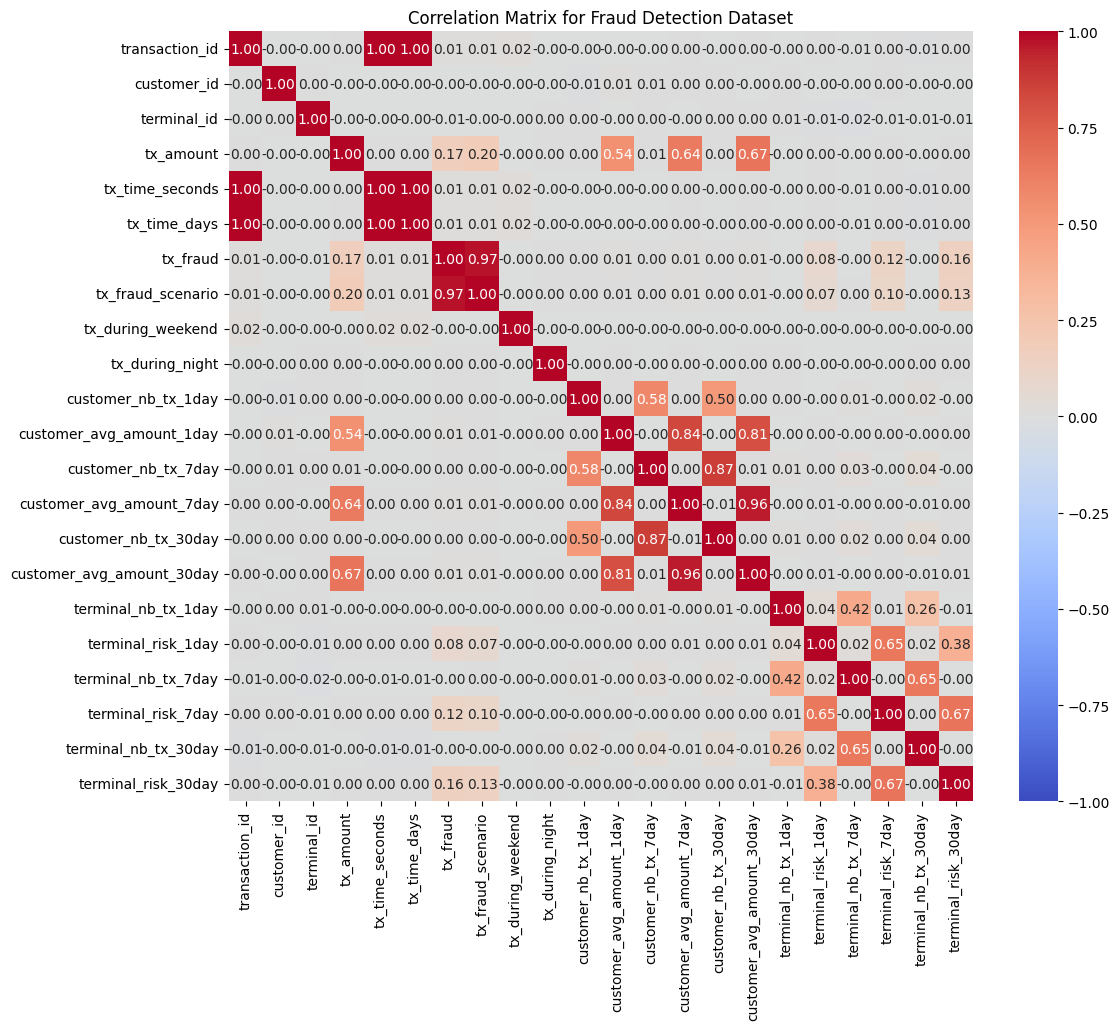

In [ ]:
# Convert TX_DATETIME to numeric
if "TX_DATETIME" in df.columns:
    df["TX_DATETIME"] = pd.to_datetime(df["TX_DATETIME"], errors='coerce')  # Ensure valid datetime
    df["TX_DATETIME_NUMERIC"] = df["TX_DATETIME"].astype("int64") // 1e9    # Convert to seconds since epoch

# Select only numeric columns
numeric_df = df.select_dtypes(include=["number"])

# Compute correlation matrix
correlation_matrix = numeric_df.corr()

# Plot the heatmap
plt.figure(figsize=(12, 10))
sns.heatmap(correlation_matrix, annot=True, cmap="coolwarm", fmt=".2f", vmin=-1, vmax=1)
plt.title("Correlation Matrix for Fraud Detection Dataset")
plt.show()



Observations on features and distributions:


1. High Correlations: customer_nb_tx_1day, customer_nb_tx_7day, and customer_nb_tx_30day exhibit strong positive correlations with their respective averages (customer_avg_amount_*).
Similarly, terminal features (terminal_nb_tx_* and terminal_risk_*) show correlations within their groups.
tx_time_seconds and tx_time_days are perfectly correlated, as they represent the same feature in different units.
2. Capped Values:Features like customer_nb_tx_* and customer_avg_amount_* might have capped values, indicated by their consistent relationship with other variables.
3. Fraud Indicator:tx_fraud appears to have minimal correlation with numerical features, suggesting the fraud labels may depend on complex interactions rather than simple linear relationships.
4. Transaction Features:Features like tx_amount have low correlations with both customer- and terminal-related features, suggesting less direct influence.












Data Cleanup Tasks:
1. Remove Redundant Features:Drop one of tx_time_seconds or tx_time_days as they are perfectly correlated and redundant.
2. Handle Multicollinearity:Consider removing highly correlated features like customer_avg_amount_* and terminal_risk_* in one time window to simplify the dataset and reduce redundancy.
3. Scale Features:Normalize or standardize features with a wide range, like tx_amount and transaction counts (*_nb_tx_*).
4. Impute or Drop Missing Values:
Verify missing data (if any) based on the report, and impute or drop rows/columns as necessary.
5. Check for Outliers:Inspect capped values in features like customer_nb_tx_* and customer_avg_amount_* for potential outliers.
6. Feature Engineering:Create interaction terms or derived features, such as ratios (e.g., tx_amount relative to average terminal or customer amounts).
7. Encoding Categorical Features:If categorical variables are present (not shown in the heatmap), ensure proper encoding before modeling.

## Experiment 1: Preprocessing Pipeline with Logistic Regression and MLflow Logging

In [ ]:
# experiment 1
mlflow.set_experiment("Experiment-1")

# Loading dataset
df = pd.read_csv("credit_card_fraud_data.csv")

# Convert TX_DATETIME into useful features
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['TX_DAYOFWEEK'] = df['TX_DATETIME'].dt.dayofweek  # Day of the week
df['TX_HOUR'] = df['TX_DATETIME'].dt.hour  # Hour of the day
df['TX_MONTH'] = df['TX_DATETIME'].dt.month  # Month
df['TX_YEAR'] = df['TX_DATETIME'].dt.year  # Year
df['TX_DAY'] = df['TX_DATETIME'].dt.day  # Day of the month
df['TX_TIME_DIFF'] = (df['TX_DATETIME'] - df['TX_DATETIME'].min()).dt.total_seconds()  # Time difference

# Features and target variable
X = df.drop(columns=['TX_FRAUD', 'TX_DATETIME'])
y = df['TX_FRAUD']

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=False)),
    ('scaler', StandardScaler()),
    ('minmax', MinMaxScaler())
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # OneHotEncoding for categorical features

# Combine both transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

with mlflow.start_run():
# Create a logistic regression model
    model = LogisticRegression()

    # Create a pipeline with preprocessing and model
    pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                               ('model', model)])

    # Cross-validation (3/10 folds)
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

    # Perform cross-validation
    cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring="f1")

    print(f"Cross-Validation Mean F1 Score: {np.mean(cv_scores):.4f}")
    print(f"Cross-Validation Std F1 Score: {np.std(cv_scores):.4f}")

    # Fit the pipeline to the entire dataset and print confusion matrix
    pipeline.fit(X, y)
    y_pred = pipeline.predict(X)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    print("\nConfusion Matrix:")
    print(f"True Negatives: {tn}")
    print(f"False Positives: {fp}")
    print(f"False Negatives: {fn}")
    print(f"True Positives: {tp}")

    # Hyperparameter tuning
    param_grid = {
        'model__C': [0.1, 1, 10],
        'model__max_iter': [100, 200]
    }

    grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1')
    grid_search.fit(X, y)

    # Print best parameters and best score
    print("\nBest Hyperparameters:")
    print(grid_search.best_params_)
    print(f"Best F1 Score: {grid_search.best_score_:.4f}")

    mlflow.log_metric("TP", tp)
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)
    mlflow.log_metric("Best F1 Score", grid_search.best_score_)
    mlflow.log_params( grid_search.best_params_)



Cross-Validation Mean F1 Score: 0.9983
Cross-Validation Std F1 Score: 0.0003

Confusion Matrix:
True Negatives: 1739473
False Positives: 1
False Negatives: 24
True Positives: 14657

Best Hyperparameters:
{'model__C': 0.1, 'model__max_iter': 100}
Best F1 Score: 1.0000
🏃 View run beautiful-dog-347 at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/0/runs/707d0fede72043bb8be5514f753e5f42
🧪 View experiment at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/0


## Experiment 2: Preprocessing Pipeline with Multiple Classifiers and MLflow Logging

In [ ]:
# experiment-2
mlflow.set_experiment("Experiment-2")

# Preprocessing pipeline
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

# Preprocessing steps
numeric_transformer = Pipeline(steps=[
    ('log', FunctionTransformer(np.log1p, validate=False)),  # Log Transformation
    ('scaler', StandardScaler()),  # StandardScaler
    ('minmax', MinMaxScaler())  # MinMaxScaler
])

categorical_transformer = OneHotEncoder(handle_unknown='ignore')  # OneHotEncoding for categorical features

# Combine both transformers into a preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)
    ])

# Define models

models = {
    "Logistic Regression": LogisticRegression(),
    "Ridge Classifier": RidgeClassifier(),
    "Random Forest": RandomForestClassifier(),
    "XGBoost": XGBClassifier(eval_metric="mlogloss")  # XGBoost requires eval_metric for classification
}

for model_name, model in models.items():
    with mlflow.start_run():
        # Log model hyperparameters
        mlflow.log_param("model", model_name)

        # Create a pipeline with preprocessing and model
        pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                                   ('model', model)])

        # Cross-validation (3/10 fold)
        cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)

        # Perform cross-validation
        cv_scores = cross_val_score(pipeline, X, y, cv=cv, scoring="f1")

        # Log metrics for cross-validation results
        mlflow.log_metric(f"{model_name}_mean_f1_score", np.mean(cv_scores))
        mlflow.log_metric(f"{model_name}_std_f1_score", np.std(cv_scores))

        # Log confusion matrix for the last fold
        pipeline.fit(X, y)
        y_pred = pipeline.predict(X)
        tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

        mlflow.log_metric(f"{model_name}_TN", tn)
        mlflow.log_metric(f"{model_name}_FP", fp)
        mlflow.log_metric(f"{model_name}_FN", fn)
        mlflow.log_metric(f"{model_name}_TP", tp)

        # Log the model
        mlflow.sklearn.log_model(pipeline, f"{model_name}_model")

2024/12/21 23:42:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run adorable-roo-657 at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/1/runs/554fe05b6d4c4c5b80b56ab6cc2325ad
🧪 View experiment at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/1


2024/12/21 23:42:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run abrasive-bee-821 at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/1/runs/55d23315582b40879ef9b173135179ea
🧪 View experiment at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/1


2024/12/21 23:59:40 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run loud-rook-612 at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/1/runs/07d06b4beb6e4ae2b4bb12ca9be417c5
🧪 View experiment at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/1


/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags__` will raise an error.
  warnings.warn(
/usr/local/lib/python3.10/dist-packages/sklearn/utils/_tags.py:354: FutureWarning: The XGBClassifier or classes from which it inherits use `_get_tags` and `_more_tags`. Please define the `__sklearn_tags__` method, or inherit from `sklearn.base.BaseEstimator` and/or other appropriate mixins such as `sklearn.base.TransformerMixin`, `sklearn.base.ClassifierMixin`, `sklearn.base.RegressorMixin`, and `sklearn.base.OutlierMixin`. From scikit-learn 1.7, not defining `__sklearn_tags

🏃 View run lyrical-slug-102 at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/1/runs/058638f1380b47508a2e1fb2885d16eb
🧪 View experiment at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/1


AttributeError: 'super' object has no attribute '__sklearn_tags__'

##  Experiment 3: Feature Engineering and Attribute Combination

In [ ]:
# experiment-3
# Aggregate features

import pandas as pd
import numpy as np
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import StandardScaler, FunctionTransformer
from sklearn.model_selection import StratifiedKFold, train_test_split, GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import f1_score, confusion_matrix

df = pd.read_csv("credit_card_fraud_data.csv")

# Ensuring datetime column is in proper format
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])

# Feature Engineering
# Extract time-based features
df['TX_HOUR'] = df['TX_DATETIME'].dt.hour
df['TX_DAY_OF_WEEK'] = df['TX_DATETIME'].dt.dayofweek

# Aggregate features
df['CUSTOMER_ID_NB_TX_RATIO_7_30DAY'] = df['CUSTOMER_ID_NB_TX_7DAY_WINDOW'] / (
    df['CUSTOMER_ID_NB_TX_30DAY_WINDOW'] + 1e-6
)
df['TERMINAL_ID_NB_TX_RATIO_1_7DAY'] = df['TERMINAL_ID_NB_TX_1DAY_WINDOW'] / (
    df['TERMINAL_ID_NB_TX_7DAY_WINDOW'] + 1e-6
)

# Risk-based features
df['TERMINAL_ID_RISK_RATIO_1_30DAY'] = df['TERMINAL_ID_RISK_1DAY_WINDOW'] / (
    df['TERMINAL_ID_RISK_30DAY_WINDOW'] + 1e-6
)

# Log transformations
df['LOG_TX_AMOUNT'] = np.log1p(df['TX_AMOUNT'])
df['LOG_TERMINAL_RISK_30DAY'] = np.log1p(df['TERMINAL_ID_RISK_30DAY_WINDOW'])

# Drop unused or redundant columns
unused_cols = ['TX_DATETIME', 'TX_AMOUNT']  # Keep relevant engineered features
df.drop(columns=unused_cols, inplace=True)

# Split features and target
X = df.drop(columns=['TX_FRAUD'])  # Target column
y = df['TX_FRAUD']

# Preprocessing
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns
preprocessor = ColumnTransformer(
    transformers=[
        ('num', StandardScaler(), numeric_features),
    ]
)

# Model and pipeline
model = LogisticRegression(solver='liblinear', max_iter=1000)
pipeline = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', model)
])

# Hyperparameter tuning
param_grid = {
    'classifier__C': [0.1, 1, 10],
    'classifier__penalty': ['l1', 'l2']
}
cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
grid_search = GridSearchCV(pipeline, param_grid, cv=cv, scoring='f1', n_jobs=-1)

# Log results to MLflow
with mlflow.start_run():
    # Train and tune the model
    grid_search.fit(X, y)
    best_model = grid_search.best_estimator_

    # Compute metrics
    y_pred = best_model.predict(X)
    f1 = f1_score(y, y_pred)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()

    # Log parameters and metrics
    mlflow.log_params(grid_search.best_params_)
    mlflow.log_metric("f1_score", f1)
    mlflow.log_metric("true_positive", tp)
    mlflow.log_metric("true_negative", tn)
    mlflow.log_metric("false_positive", fp)
    mlflow.log_metric("false_negative", fn)

    # Log the model
    mlflow.sklearn.log_model(best_model, "feature_engineering_pipeline")

    print("Feature Engineering and Experiment logged successfully!")

2024/12/21 19:16:02 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


Feature Engineering and Experiment logged successfully!
🏃 View run indecisive-fowl-745 at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/1/runs/93531e6b110042989d901a38300a4913
🧪 View experiment at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/1


## Experiment 4: Feature Selection using Correlation Threshold, Feature Importance, and Variance Threshold

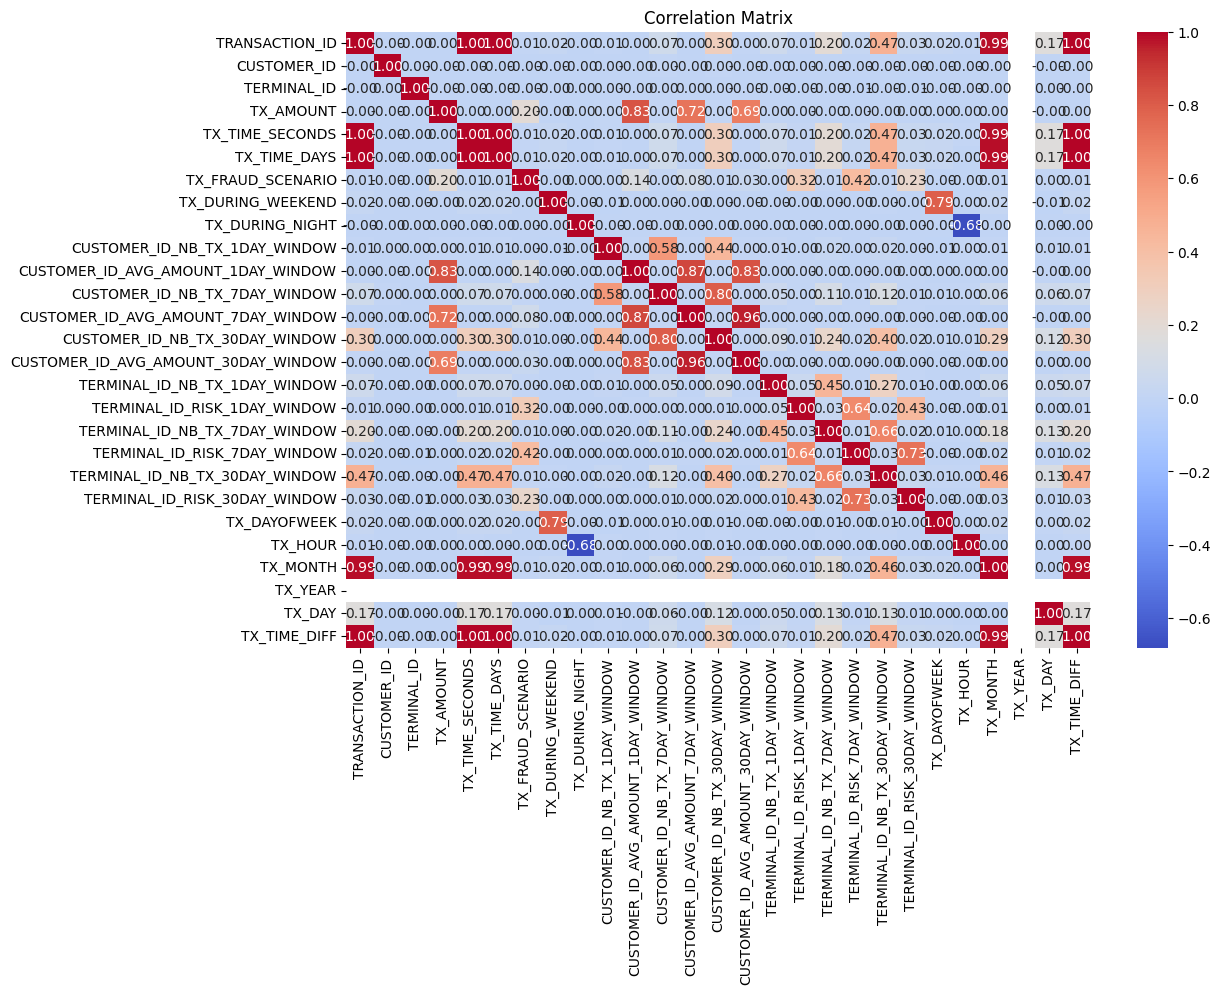

Index(['TRANSACTION_ID', 'CUSTOMER_ID', 'TERMINAL_ID', 'TX_AMOUNT',
       'TX_FRAUD_SCENARIO', 'TX_DURING_WEEKEND', 'TX_DURING_NIGHT',
       'CUSTOMER_ID_NB_TX_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW',
       'CUSTOMER_ID_NB_TX_7DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_7DAY_WINDOW',
       'CUSTOMER_ID_NB_TX_30DAY_WINDOW', 'TERMINAL_ID_NB_TX_1DAY_WINDOW',
       'TERMINAL_ID_RISK_1DAY_WINDOW', 'TERMINAL_ID_NB_TX_7DAY_WINDOW',
       'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_NB_TX_30DAY_WINDOW',
       'TERMINAL_ID_RISK_30DAY_WINDOW', 'TX_DAYOFWEEK', 'TX_HOUR', 'TX_YEAR',
       'TX_DAY'],
      dtype='object')


In [ ]:
# experiment 4
mlflow.set_experiment("Experiment-4")

df = pd.read_csv("credit_card_fraud_data.csv")

# Feature engineering
df['TX_DATETIME'] = pd.to_datetime(df['TX_DATETIME'])
df['TX_DAYOFWEEK'] = df['TX_DATETIME'].dt.dayofweek  # Day of the week
df['TX_HOUR'] = df['TX_DATETIME'].dt.hour  # Hour of the day
df['TX_MONTH'] = df['TX_DATETIME'].dt.month  # Month
df['TX_YEAR'] = df['TX_DATETIME'].dt.year  # Year
df['TX_DAY'] = df['TX_DATETIME'].dt.day  # Day of the month
df['TX_TIME_DIFF'] = (df['TX_DATETIME'] - df['TX_DATETIME'].min()).dt.total_seconds()  # Time difference

# Features and target variable
X = df.drop(columns=['TX_FRAUD', 'TX_DATETIME'])  # Drop target and date columns
y = df['TX_FRAUD']

# Step 1: Correlation Threshold
correlation_matrix = X.corr()
plt.figure(figsize=(12, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# Set a correlation threshold to remove highly correlated features
threshold = 0.9
corr_to_drop = set()  # Set to hold correlated features to drop
for i in range(len(correlation_matrix.columns)):
    for j in range(i):
        if abs(correlation_matrix.iloc[i, j]) > threshold:
            colname = correlation_matrix.columns[i]
            corr_to_drop.add(colname)

X_corr_filtered = X.drop(columns=corr_to_drop)

# Step 2: Feature Importance using RandomForestClassifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_corr_filtered, y)

# Get feature importances
feature_importances = pd.DataFrame(model.feature_importances_,
                                   index=X_corr_filtered.columns,
                                   columns=["importance"]).sort_values("importance", ascending=False)

# Select the top N features (top 10)
top_features = feature_importances.head(10).index.tolist()

# Filter the data to keep only the most important features
X_important_features = X_corr_filtered[top_features]
print(X_important_features)

# Step 3: Variance Threshold
# Remove features with low variance
variance_threshold = VarianceThreshold(threshold=0.01)  # e.g., 1% variance
X_variance_filtered = variance_threshold.fit_transform(X_important_features)

# Convert back to a DataFrame for logging
X_variance_filtered = pd.DataFrame(X_variance_filtered, columns=X_important_features.columns[variance_threshold.get_support()])

with mlflow.start_run():
    # Log Correlation Threshold results
    mlflow.log_param("correlation_threshold", threshold)
    mlflow.log_param("features_dropped_by_correlation", list(corr_to_drop))

    # Log Feature Importance results
    mlflow.log_param("top_important_features", top_features)

    # Log Variance Threshold results
    mlflow.log_param("variance_threshold", 0.01)
    mlflow.log_param("features_dropped_by_variance", list(set(X_important_features.columns) - set(X_variance_filtered.columns)))

    # Evaluate model using the selected features
    cv = StratifiedKFold(n_splits=3, shuffle=True, random_state=42)
    model = RandomForestClassifier(n_estimators=100, random_state=42)

    f1_scores = []
    for train_idx, test_idx in cv.split(X_variance_filtered, y):
        X_train, X_test = X_variance_filtered.iloc[train_idx], X_variance_filtered.iloc[test_idx]
        y_train, y_test = y.iloc[train_idx], y.iloc[test_idx]

        model.fit(X_train, y_train)
        y_pred = model.predict(X_test)
        f1_scores.append(f1_score(y_test, y_pred))

    # Log F1 scores
    mlflow.log_metric("mean_f1_score", np.mean(f1_scores))
    mlflow.log_metric("std_f1_score", np.std(f1_scores))

    # Log confusion matrix metrics
    y_pred = model.predict(X_variance_filtered)
    tn, fp, fn, tp = confusion_matrix(y, y_pred).ravel()
    mlflow.log_metric("TN", tn)
    mlflow.log_metric("FP", fp)
    mlflow.log_metric("FN", fn)
    mlflow.log_metric("TP", tp)

    # Log the model
    mlflow.sklearn.log_model(model, "RandomForest_model_after_feature_selection")



## Experiment 5: PCA for Dimensionality Reduction

Selected Features (6): ['TX_FRAUD_SCENARIO', 'TX_AMOUNT', 'TERMINAL_ID_RISK_7DAY_WINDOW', 'TERMINAL_ID_RISK_30DAY_WINDOW', 'TERMINAL_ID_RISK_1DAY_WINDOW', 'CUSTOMER_ID_AVG_AMOUNT_1DAY_WINDOW']


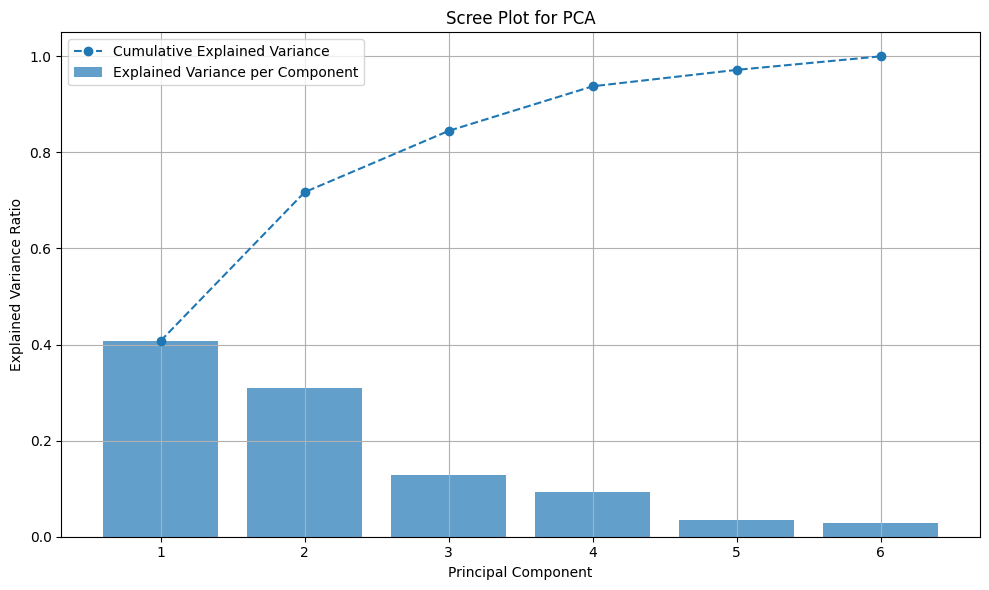

Number of components explaining 95% variance: 5


2024/12/20 20:22:13 WARNING mlflow.sklearn: Model was missing function: predict. Not logging python_function flavor!
2024/12/20 20:22:17 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


PCA results and scree plot logged to MLflow.
🏃 View run exultant-wren-168 at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/4/runs/67810e65790c4b33bd11c451936a6846
🧪 View experiment at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/4


In [ ]:
# experiment 5
mlflow.set_experiment("Experiment-5")

data = pd.read_csv('credit_card_fraud_data.csv')

# Convert TX_DATETIME to datetime format
data['TX_DATETIME'] = pd.to_datetime(data['TX_DATETIME'])

# Extract datetime features
data['TX_DAYOFWEEK'] = data['TX_DATETIME'].dt.dayofweek  # Day of the week
data['TX_HOUR'] = data['TX_DATETIME'].dt.hour  # Hour of the day
data['TX_MONTH'] = data['TX_DATETIME'].dt.month  # Month
data['TX_YEAR'] = data['TX_DATETIME'].dt.year  # Year
data['TX_DAY'] = data['TX_DATETIME'].dt.day  # Day of the month
data['TX_TIME_DIFF'] = (data['TX_DATETIME'] - data['TX_DATETIME'].min()).dt.total_seconds()

# Drop TX_DATETIME as it's no longer needed
data = data.drop(columns=['TX_DATETIME'])

# Define features and target
X = data.drop(columns=['TX_FRAUD'])  # Drop target column from features
y = data['TX_FRAUD']  # Target variable

# Drop any non-numeric columns in X
X = X.select_dtypes(include=[np.number])

# Step 1: Perform Feature Selection Using Random Forest
rf = RandomForestClassifier(random_state=42, n_estimators=100)
rf.fit(X, y)

# Get feature importances
feature_importances = rf.feature_importances_

# Create a dataframe to display feature importance
importance_df = pd.DataFrame({'Feature': X.columns, 'Importance': feature_importances})
importance_df = importance_df.sort_values(by='Importance', ascending=False)

# Select features with importance above a threshold
threshold = 0.01
selected_features = importance_df[importance_df['Importance'] > threshold]['Feature'].tolist()

print(f"Selected Features ({len(selected_features)}): {selected_features}")

# Filter dataset with selected features
X_selected = X[selected_features]

# Step 2: Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_selected)

# Step 3: Apply PCA
pca = PCA()
X_pca = pca.fit_transform(X_scaled)

# Scree plot (explained variance ratio)
explained_variance_ratio = pca.explained_variance_ratio_
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

plt.figure(figsize=(10, 6))
plt.plot(
    range(1, len(explained_variance_ratio) + 1),
    cumulative_variance_ratio,
    marker='o',
    linestyle='--',
    label='Cumulative Explained Variance',
)
plt.bar(
    range(1, len(explained_variance_ratio) + 1),
    explained_variance_ratio,
    alpha=0.7,
    label='Explained Variance per Component',
)
plt.xlabel('Principal Component')
plt.ylabel('Explained Variance Ratio')
plt.title('Scree Plot for PCA')
plt.legend()
plt.grid()
plt.tight_layout()
plt.savefig('scree_plot.png')
plt.show()

# Step 4: Choose the number of components
n_components = np.argmax(cumulative_variance_ratio >= 0.95) + 1
print(f"Number of components explaining 95% variance: {n_components}")

# Apply PCA with selected components
pca_selected = PCA(n_components=n_components)
X_pca_selected = pca_selected.fit_transform(X_scaled)

with mlflow.start_run():
    mlflow.log_param("n_selected_features", len(selected_features))
    mlflow.log_param("n_components", n_components)
    mlflow.log_metric("total_explained_variance", cumulative_variance_ratio[n_components - 1])
    mlflow.log_artifact("scree_plot.png", artifact_path="plots")
    mlflow.sklearn.log_model(pca_selected, artifact_path="models/pca_model")

    importance_df.to_csv("feature_importances.csv", index=False)
    mlflow.log_artifact("feature_importances.csv", artifact_path="artifacts")

    print("PCA results and scree plot logged to MLflow.")

## Experiment 6: Trainind SVM Model with Preprocessing, Evaluation, and MLflow Logging

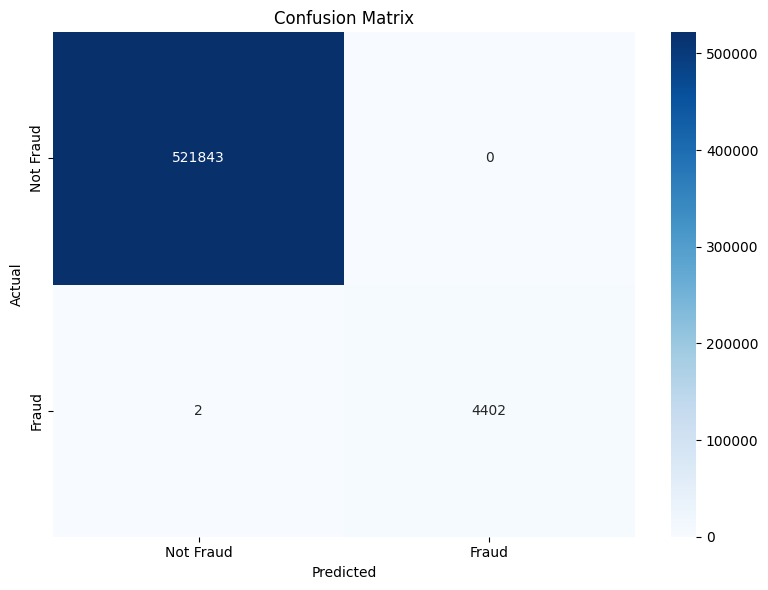

2024/12/20 20:07:10 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


F1 Score logged: 0.9997728821258233
🏃 View run adorable-jay-36 at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/5/runs/0092a977bc87411baa5967963eda7099
🧪 View experiment at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/5


In [ ]:
# experiment 6
mlflow.set_experiment("Experiment-6")
data = pd.read_csv('credit_card_fraud_data.csv')

# Preprocess the dataset
# Convert TX_DATETIME to datetime
data['TX_DATETIME'] = pd.to_datetime(data['TX_DATETIME'], errors='coerce')
data = data.dropna(subset=['TX_DATETIME'])  # Drop rows where conversion failed

# Extract datetime features
data['TX_DAYOFWEEK'] = data['TX_DATETIME'].dt.dayofweek
data['TX_HOUR'] = data['TX_DATETIME'].dt.hour
data['TX_MONTH'] = data['TX_DATETIME'].dt.month
data['TX_YEAR'] = data['TX_DATETIME'].dt.year
data['TX_DAY'] = data['TX_DATETIME'].dt.day
data['TX_TIME_DIFF'] = (data['TX_DATETIME'] - data['TX_DATETIME'].min()).dt.total_seconds()

# Drop unnecessary columns
X = data.drop(columns=['TX_FRAUD', 'TX_DATETIME'])
y = data['TX_FRAUD']

# Standardize the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.3, random_state=42, stratify=y)

# Train an SVM model
svm_model = SVC(kernel='rbf', C=1.0, gamma='scale', random_state=42)

with mlflow.start_run():
    # Log model parameters
    mlflow.log_param("kernel", "rbf")
    mlflow.log_param("C", 1.0)
    mlflow.log_param("gamma", "scale")

    # Train the model
    svm_model.fit(X_train, y_train)

    # Make predictions
    y_pred = svm_model.predict(X_test)

    # Evaluate the model
    f1 = f1_score(y_test, y_pred)
    conf_matrix = confusion_matrix(y_test, y_pred)

    # Log metrics
    mlflow.log_metric("f1_score", f1)

    # Save and log confusion matrix plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Fraud', 'Fraud'], yticklabels=['Not Fraud', 'Fraud'])
    plt.xlabel('Predicted')
    plt.ylabel('Actual')
    plt.title('Confusion Matrix')
    plt.tight_layout()
    plot_path = "confusion_matrix.png"
    plt.savefig(plot_path)
    plt.show()
    mlflow.log_artifact(plot_path, artifact_path="plots")

    # Log the trained model
    mlflow.sklearn.log_model(svm_model, artifact_path="models/svm_model")

    print(f"F1 Score logged: {f1}")


## Experiment 7: Training a Naive Bayes Model with Evaluation, Visualization, and MLflow Logging

In [ ]:
#experiment 7
mlflow.set_experiment("Experiment-7")
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import f1_score, confusion_matrix, classification_report
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
import matplotlib.pyplot as plt

# Preprocess the dataset
# Convert TX_DATETIME to datetime
data = pd.read_csv('credit_card_fraud_data.csv')
data['TX_DATETIME'] = pd.to_datetime(data['TX_DATETIME'], errors='coerce')
data = data.dropna(subset=['TX_DATETIME'])  # Drop rows where conversion failed

# Extract datetime features
data['TX_DAYOFWEEK'] = data['TX_DATETIME'].dt.dayofweek
data['TX_HOUR'] = data['TX_DATETIME'].dt.hour
data['TX_MONTH'] = data['TX_DATETIME'].dt.month
data['TX_YEAR'] = data['TX_DATETIME'].dt.year
data['TX_DAY'] = data['TX_DATETIME'].dt.day
data['TX_TIME_DIFF'] = (data['TX_DATETIME'] - data['TX_DATETIME'].min()).dt.total_seconds()

# Drop unnecessary columns
X = data.drop(columns=['TX_FRAUD', 'TX_DATETIME'])
y = data['TX_FRAUD']

# Step 2: Initialize and train the Naive Bayes model
nb_model = GaussianNB()

with mlflow.start_run(nested=True):
    # Train the model
    nb_model.fit(X_train, y_train)

    # Predict on the test set
    y_pred = nb_model.predict(X_test)

    # Calculate F1 score
    f1 = f1_score(y_test, y_pred, average="binary")

    # Generate confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Log F1 score
    mlflow.log_metric("F1 Score", f1)

    # Log model
    mlflow.sklearn.log_model(nb_model, artifact_path="models/naive_bayes")

    # Log confusion matrix as a plot
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt="d", cmap="Blues", xticklabels=["Non-Fraud", "Fraud"], yticklabels=["Non-Fraud", "Fraud"])
    plt.xlabel("Predicted")
    plt.ylabel("Actual")
    plt.title("Confusion Matrix")
    plt.tight_layout()
    plt.savefig("confusion_matrix.png")
    mlflow.log_artifact("confusion_matrix.png", artifact_path="plots")
    plt.close()

    # Log classification report
    report = classification_report(y_test, y_pred, output_dict=True)
    mlflow.log_metric("Precision", report["1"]["precision"])
    mlflow.log_metric("Recall", report["1"]["recall"])
    mlflow.log_metric("F1-Score for Class 1", report["1"]["f1-score"])
    mlflow.log_metric("Accuracy", report["accuracy"])

# Print F1 score and confusion matrix for verification
print(f"F1 Score: {f1}")
print("Confusion Matrix:")
print(cm)



2024/12/21 21:12:05 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.


🏃 View run enthused-asp-719 at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/6/runs/dfb1ad5231f34d0e84debfdaca84c7cb
🧪 View experiment at: https://dagshub.com/Bhavyak10/my-first-repo.mlflow/#/experiments/6
F1 Score: 0.04440497335701599
Confusion Matrix:
[[521843      0]
 [  4304    100]]
